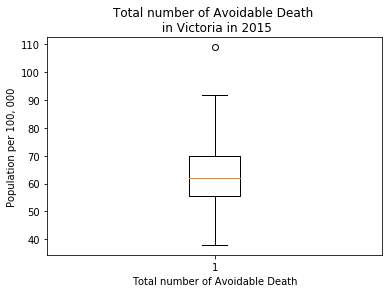

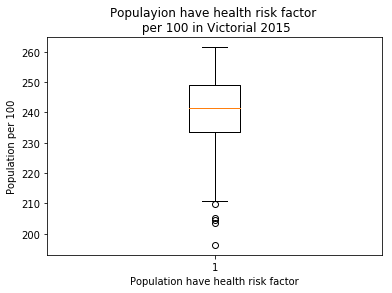

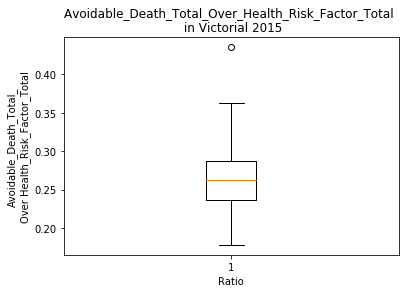

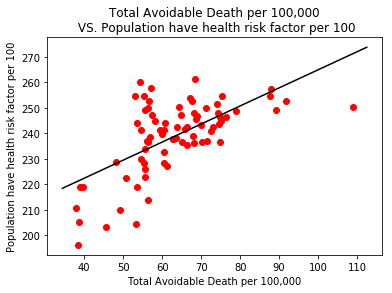

Slope:0.71, Intercept:194.06.
Pearson r is 0.63


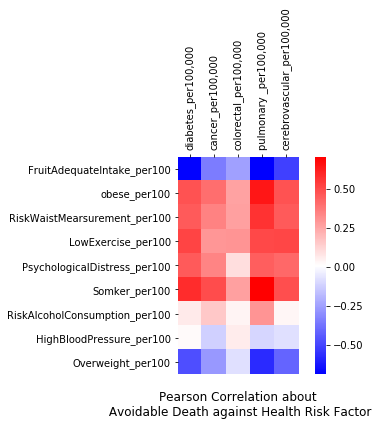

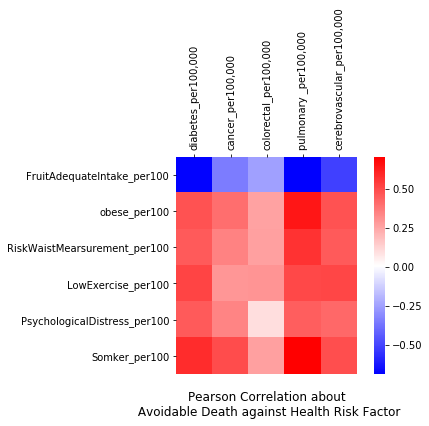

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
import seaborn as sns

df_Avoidable_Death = pd.read_csv('Avoidable_Death.csv',encoding = 'ISO-8859-1')
df_Health_Risk_Factor = pd.read_csv('Health_Risk_Factor.csv',encoding = 'ISO-8859-1')

def LinearRegressionLinePlot(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '-', color='black')

df_Avoidable_Death.sort_values(by = ['lga_code']);
df_Avoidable_Death.sort_values(by = ['lga_code']);


df_Avoidable_Death.sort_values(by = ['lga_code']);
df_Avoidable_Death.sort_values(by = ['lga_code']);

left = df_Avoidable_Death
right = df_Health_Risk_Factor 
BigDF = pd.merge(left, right, on = ['lga_code', 'lga_name']) 

df_Avoidable_Death = BigDF.iloc[:, 2:7]
df_Health_Risk_Factor= BigDF.iloc[:, 9:16]

Number_of_Null_Values_per_Row = BigDF.isnull().sum(axis = 1)
Index_of_Number_of_Null_Values_per_Row_Excess_Two = Number_of_Null_Values_per_Row\
.loc[Number_of_Null_Values_per_Row>3]

BigDF = BigDF.drop(Index_of_Number_of_Null_Values_per_Row_Excess_Two.index)

Mean_Values_All = BigDF.mean()
BigDF_Keys = BigDF.keys()
for i in BigDF_Keys[2:]:
    BigDF[i].fillna(Mean_Values_All[i], inplace=True)

Avoidable_Death_Total = BigDF.iloc[:, 2:7].sum(axis=1)
BigDF['Avoidable_Death_Total'] = Avoidable_Death_Total

Health_Risk_Factor_Total = BigDF.iloc[:, 9:16].sum(axis = 1)
BigDF['Health_Risk_Factor_Total'] = Health_Risk_Factor_Total


#Ratio = Avoidable_Death_Total_Over_Health_Risk_Factor_Total
Ratio = BigDF['Avoidable_Death_Total']/BigDF['Health_Risk_Factor_Total']
BigDF['Ratio'] = Ratio

plt.boxplot(BigDF['Avoidable_Death_Total'])
plt.ylabel('Population per 100, 000')
plt.xlabel('Total number of Avoidable Death')
plt.title('Total number of Avoidable Death \n in Victoria in 2015')
plt.show()

plt.boxplot(BigDF['Health_Risk_Factor_Total'])
plt.ylabel('Population per 100')
plt.xlabel('Population have health risk factor')
plt.title('Populayion have health risk factor \n per 100 in Victorial 2015')
plt.show()

plt.boxplot(BigDF['Ratio'])
plt.ylabel('Avoidable_Death_Total_\nOver Health_Risk_Factor_Total')
plt.xlabel('Ratio')
plt.title('Avoidable_Death_Total_Over_Health_Risk_Factor_Total \n in Victorial 2015')
plt.show()

BigDF.sort_values(['Avoidable_Death_Total']).head(1)

BigDF.sort_values(['Ratio'], ascending = False).head(1)

plt.scatter(BigDF['Avoidable_Death_Total'], BigDF['Health_Risk_Factor_Total'], color='red')
plt.title("Total Avoidable Death per 100,000\n VS. Population have health risk factor per 100")
plt.ylabel("Population have health risk factor per 100")
plt.xlabel("Total Avoidable Death per 100,000")

Info = linregress(BigDF['Avoidable_Death_Total'], BigDF['Health_Risk_Factor_Total'])
LinearRegressionLinePlot(Info[0], Info[1])
plt.show()

print("Slope:%.2f," % (Info[0]), "Intercept:%.2f." % (Info[1]))
print("Pearson r is %.2f" % (BigDF['Avoidable_Death_Total'].corr(BigDF['Health_Risk_Factor_Total'])))


#compute the Pearson correlation matrix of features of avoidable death Against features of health risk factors
Corr_Matric_All = BigDF.iloc[:, 2:].corr()

Result = Corr_Matric_All[['diabetes_per100,000','cancer_per100,000',\
                 'colorectal_per100,000', 'pulmonary _per100,000',\
                'cerebrovascular_per100,000']].loc\
[['FruitAdequateIntake_per100','obese_per100', 'RiskWaistMearsurement_per100',\
 'LowExercise_per100', 'PsychologicalDistress_per100', 'Somker_per100', \
 'RiskAlcoholConsumption_per100', 'HighBloodPressure_per100',
       'Overweight_per100']]

Result

ax = sns.heatmap(Result, cmap="bwr", square = True)
ax.xaxis.tick_top()
plt.xticks(rotation = 90)
ax.set_title('Pearson Correlation about\n Avoidable Death against Health Risk Factor',\
             rotation='horizontal',x=0.5 ,y= -0.22)
plt.show()

BigDF.drop(columns = ['RiskAlcoholConsumption_per100', 'HighBloodPressure_per100', 'Overweight_per100'])

#compute the Pearson correlation matrix of features of avoidable death Against features of health risk factors
Corr_Matric_All = BigDF.iloc[:, 2:].corr()

Result = Corr_Matric_All[['diabetes_per100,000','cancer_per100,000',\
                 'colorectal_per100,000', 'pulmonary _per100,000',\
                'cerebrovascular_per100,000']].loc\
[['FruitAdequateIntake_per100','obese_per100', 'RiskWaistMearsurement_per100',\
 'LowExercise_per100', 'PsychologicalDistress_per100', 'Somker_per100']]

Result

ax = sns.heatmap(Result, cmap="bwr", square = True)
ax.xaxis.tick_top()
plt.xticks(rotation = 90)
ax.set_title('Pearson Correlation about\n Avoidable Death against Health Risk Factor',\
             rotation='horizontal',x=0.5 ,y= -0.22)
plt.show(ax)